In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
framingham = pd.read_csv('/content/framingham.csv')

In [3]:
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Exploratory Data Visualization

<Axes: xlabel='education', ylabel='count'>

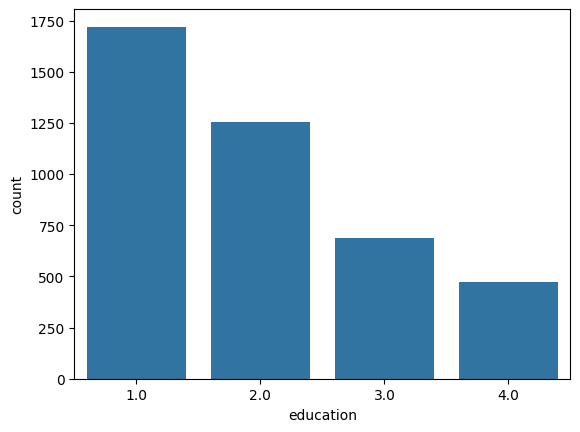

In [4]:
sns.countplot(x='education',data=framingham)

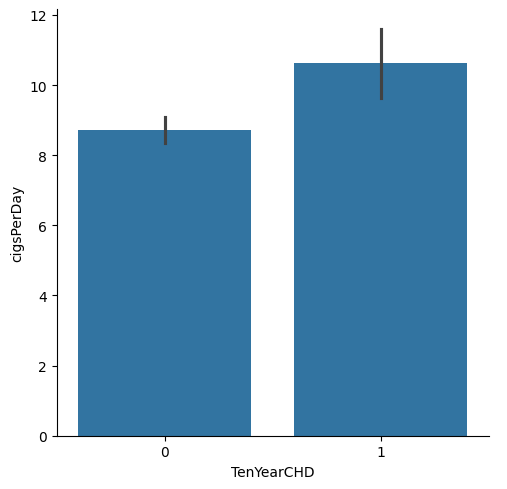

In [5]:
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=framingham)

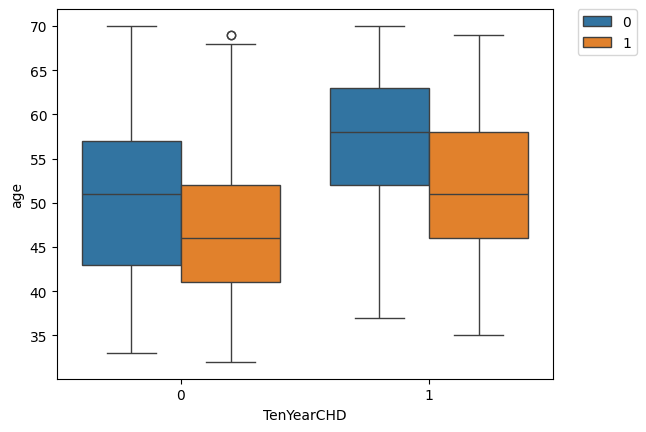

In [6]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

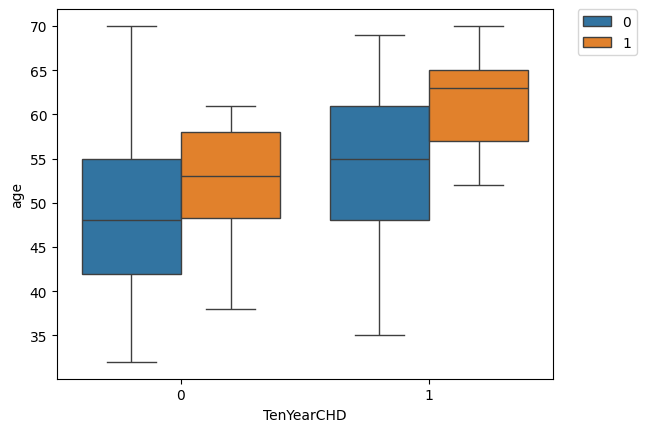

In [7]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

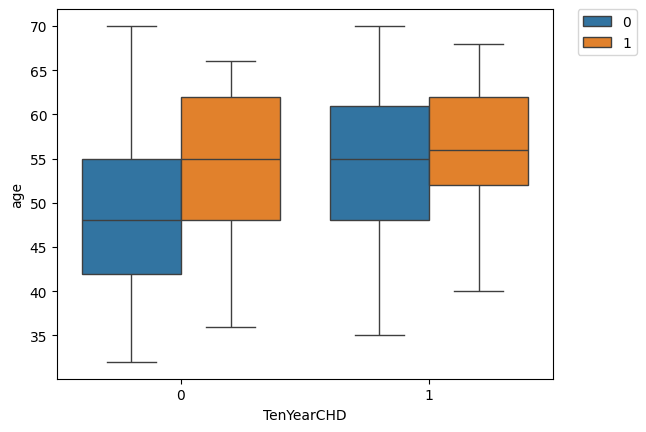

In [8]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=framingham)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(80.0, 725.45)

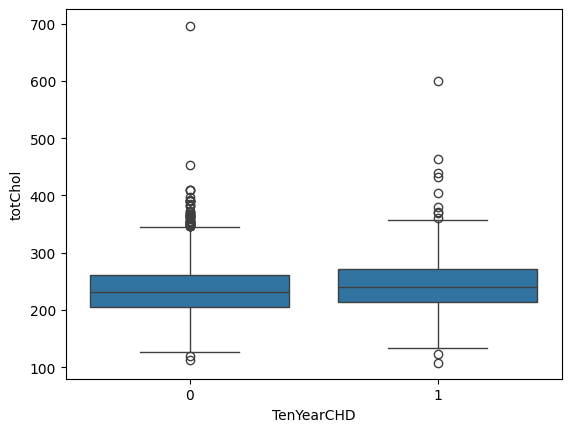

In [9]:
sns.boxplot(x='TenYearCHD',y='totChol',data=framingham)
plt.ylim(80)

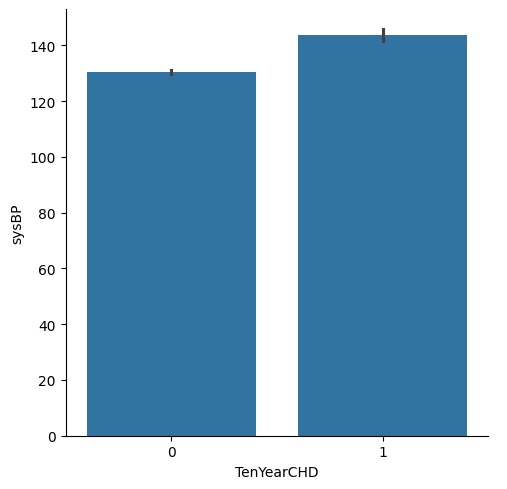

In [10]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=framingham)

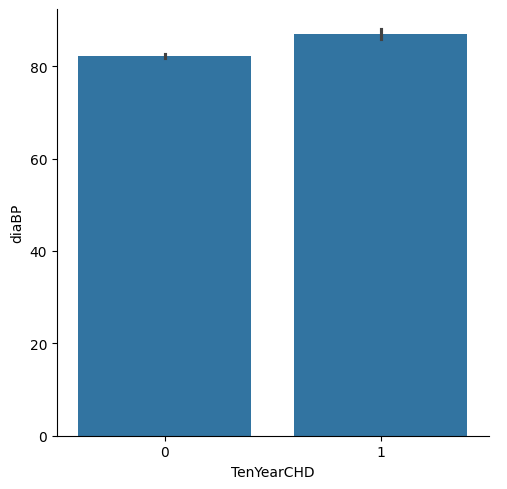

In [11]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=framingham)

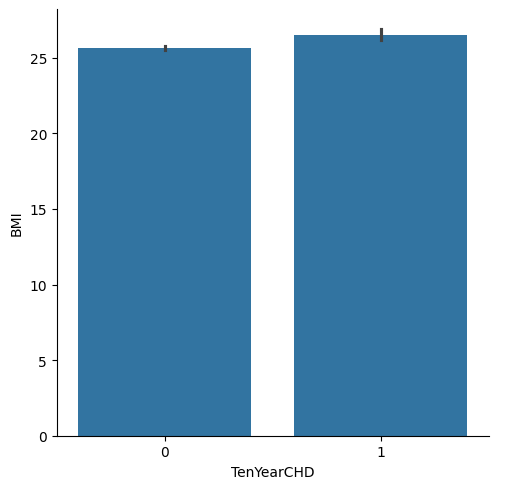

In [12]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=framingham)

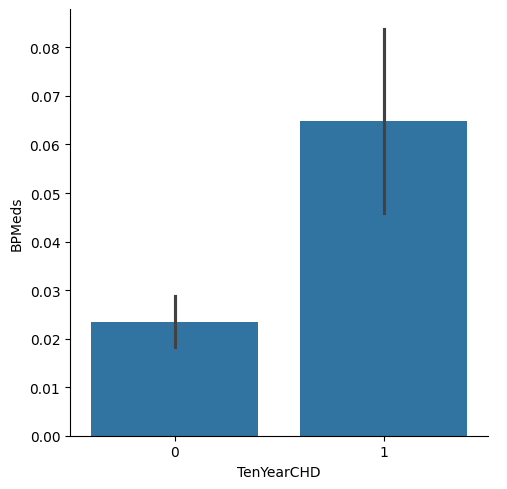

In [13]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=framingham)

## Data Preprocessing

In [14]:
# Checking for null values
framingham.isnull().any()

,0
male,False
age,False
education,True
currentSmoker,False
cigsPerDay,True
BPMeds,True
prevalentStroke,False
prevalentHyp,False
diabetes,False
totChol,True


In [15]:
# Dropping null values
framingham = framingham.dropna()

In [16]:
framingham.isnull().any()

,0
male,False
age,False
education,False
currentSmoker,False
cigsPerDay,False
BPMeds,False
prevalentStroke,False
prevalentHyp,False
diabetes,False
totChol,False


In [17]:
framingham['TenYearCHD'].value_counts()

,count
TenYearCHD,
0,3101
1,557


In [18]:
# Baseline accuracy:
3101/(3101+557)

0.8477310005467469

## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = framingham.drop('TenYearCHD',axis=1)
y = framingham['TenYearCHD']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)

## Oversampling and Undersampling

In [23]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)

In [24]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

## Fitting the data to the pipeline

In [25]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

## Making predictions on test data

In [26]:
pipepred = pipeline.predict(X_test)

## Evaluating the model

In [27]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1076
           1       0.84      1.00      0.91      1095

    accuracy                           0.90      2171
   macro avg       0.92      0.90      0.90      2171
weighted avg       0.92      0.90      0.90      2171



In [28]:
accuracy_score(y_test,pipepred)

0.9032703823122985

The model has high precision and recall for both outcomes, and has an accuracy of 0.90, which beats the baseline.